## Mask RCNN

Here we show an example on how to use Mask RCNN a Deep Learning method designed to detect objects in images.

In [14]:
import torchvision
from torchvision.models.detection import MaskRCNN_ResNet50_FPN_Weights
import skimage
import matplotlib.pyplot as plt

## Import the model

In [2]:
weights =MaskRCNN_ResNet50_FPN_Weights.DEFAULT
model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights=weights)
transform = weights.transforms()

## Import an image and transform the array type

In [5]:
image = skimage.io.imread('https://github.com/guiwitz/EHML/blob/main/datasets/woody_baille.JPG?raw=true')

In [6]:
image_tensor = transform(torchvision.transforms.functional.to_pil_image(image))

## Do the prediction

In [7]:
model.eval()
predictions = model([image_tensor])[0]

Predictions is a dictionary with bounding boxes, predicted labels, scores etc.

In [9]:
predictions

{'boxes': tensor([[ 442.2882,  297.8346,  489.9794,  378.3781],
         [ 235.9646,  478.7657, 1492.5051, 1023.7161],
         [1054.6318,  317.7040, 1198.5635,  506.7921],
         [ 480.4891,  353.3861,  506.2694,  378.3013],
         [ 531.3076,  336.4467,  571.9874,  379.8290],
         [ 508.3480,  316.2885,  574.5228,  382.0264],
         [ 507.4556,  321.4954,  549.8157,  374.5164],
         [ 420.7389,  258.1606,  488.2146,  379.0027],
         [1094.6823,  876.0731, 1240.4280,  990.1404],
         [ 449.3928,  347.6975,  482.8767,  378.2323],
         [ 404.8115,  283.9622,  449.7747,  359.8658],
         [1105.1833,  353.7354, 1196.5022,  499.3492],
         [ 446.0705,  332.2574,  486.5473,  378.5045],
         [   6.8576,  425.3579,  377.2955,  718.7040],
         [ 399.8542,  241.6270,  457.8760,  378.1493],
         [ 551.3427,  317.5446,  575.9993,  357.3444],
         [ 411.2743,  307.5649,  443.9325,  358.6660],
         [ 524.3069,  316.9246,  555.9399,  365.7174],
 

We can use logical indexing to recover prabable labels:

In [10]:
selected = predictions['labels'][predictions['scores'] > 0.6]
selected

tensor([64, 17])

And find the categories of these labels:

In [11]:
categories = weights.meta['categories']
categories[17]

'cat'

## Masks

Finally we can look at the probability masks and bounding boxes:

In [12]:
masks_selected = predictions['masks'][(predictions['scores'] > 0.6)].detach()[:,0]

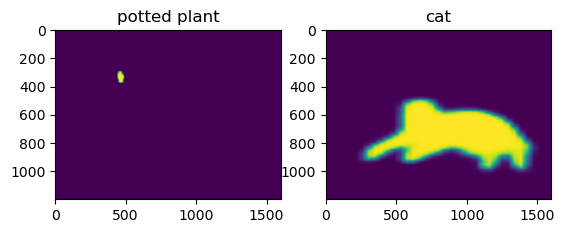

In [15]:
fig, axes = plt.subplots(1,2)
for ind, ax in enumerate(axes.ravel()):
    ax.imshow(masks_selected[ind])
    ax.set_title(categories[selected[ind].numpy()])

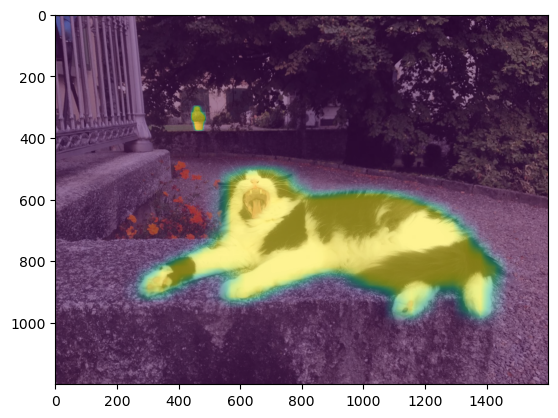

In [16]:
plt.imshow(image)
plt.imshow(masks_selected.sum(axis=0).detach(), alpha = 0.5);

## Visualization tools from torchvision

In [20]:
from torchvision.utils import draw_bounding_boxes
import torchvision.transforms.functional as F
import torch

score_threshold = 0.9
result = draw_bounding_boxes(image=(255*image_tensor).to(torch.uint8),
                             boxes=predictions['boxes'][predictions['scores'] > score_threshold],
                             colors=['red','blue', 'yellow'], width=5)

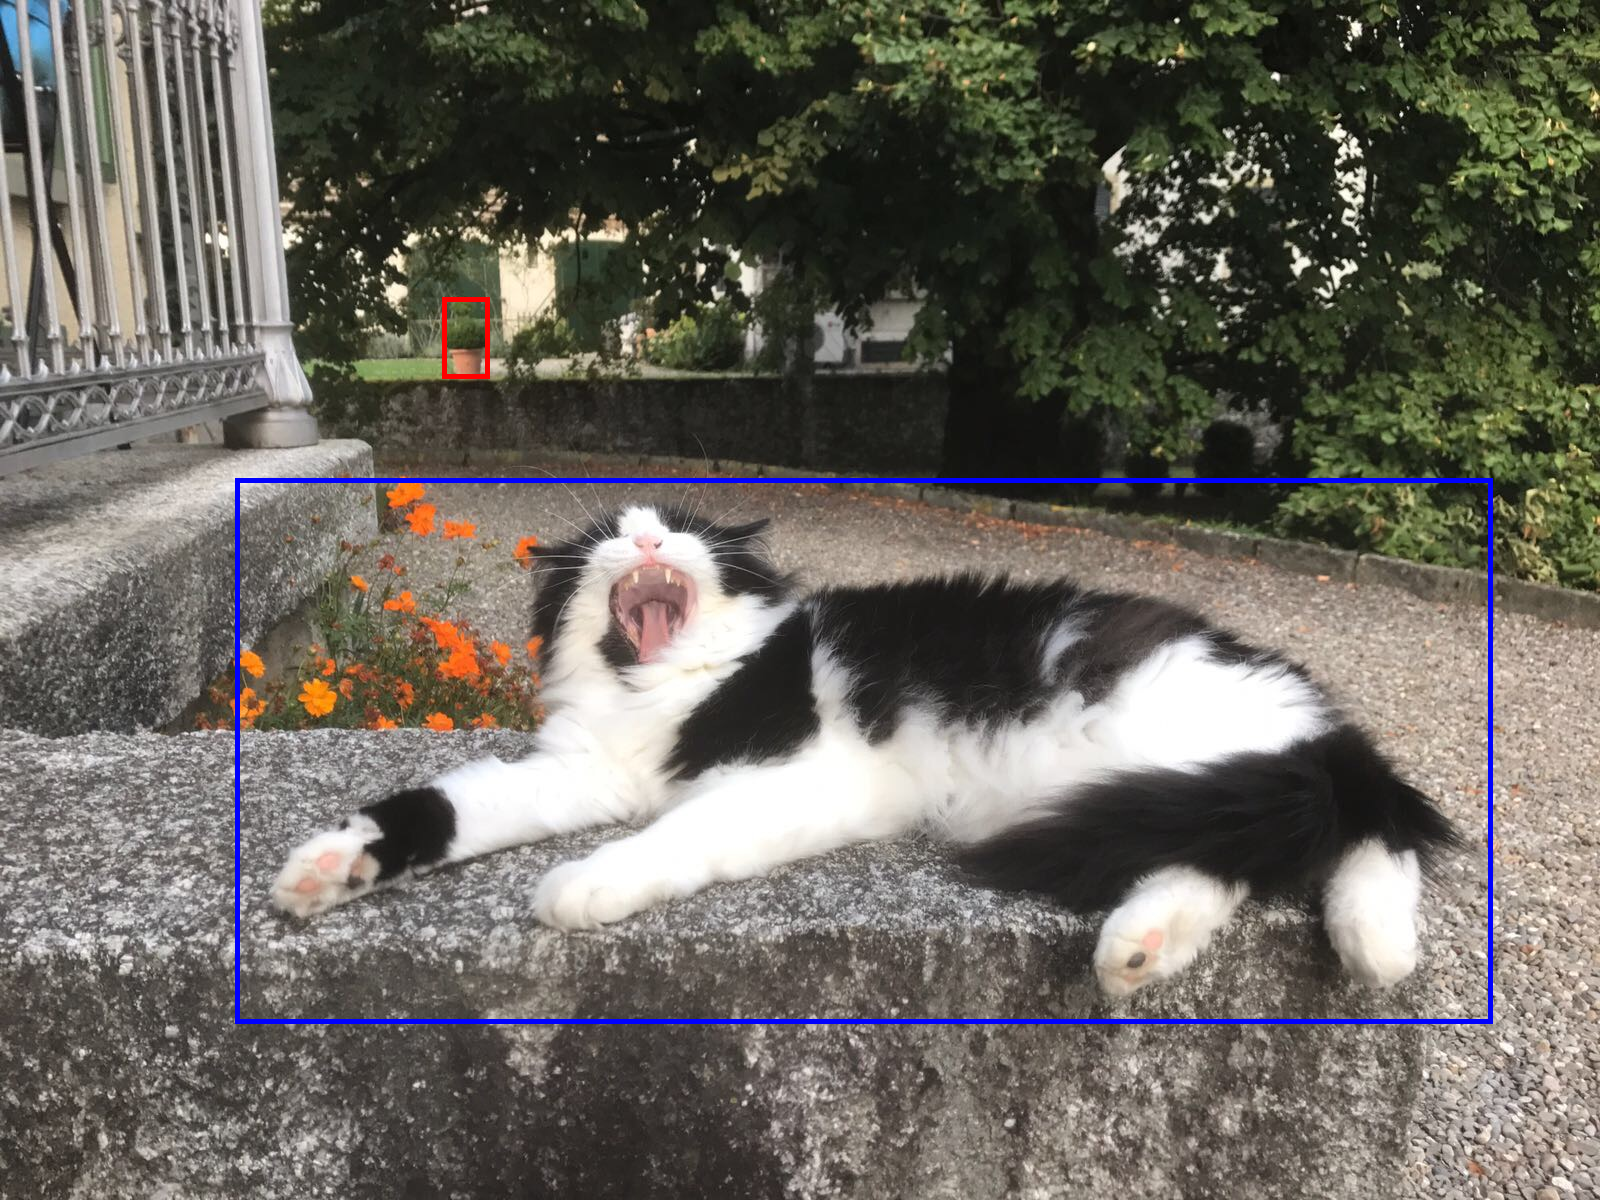

In [21]:
F.to_pil_image(result)

In [22]:
from torchvision.utils import draw_segmentation_masks

In [23]:
masks_selected = predictions['masks'][(predictions['scores'] > 0.6)]

In [24]:
result = draw_segmentation_masks((255*image_tensor).to(torch.uint8), masks=masks_selected[:,0]>0.5);

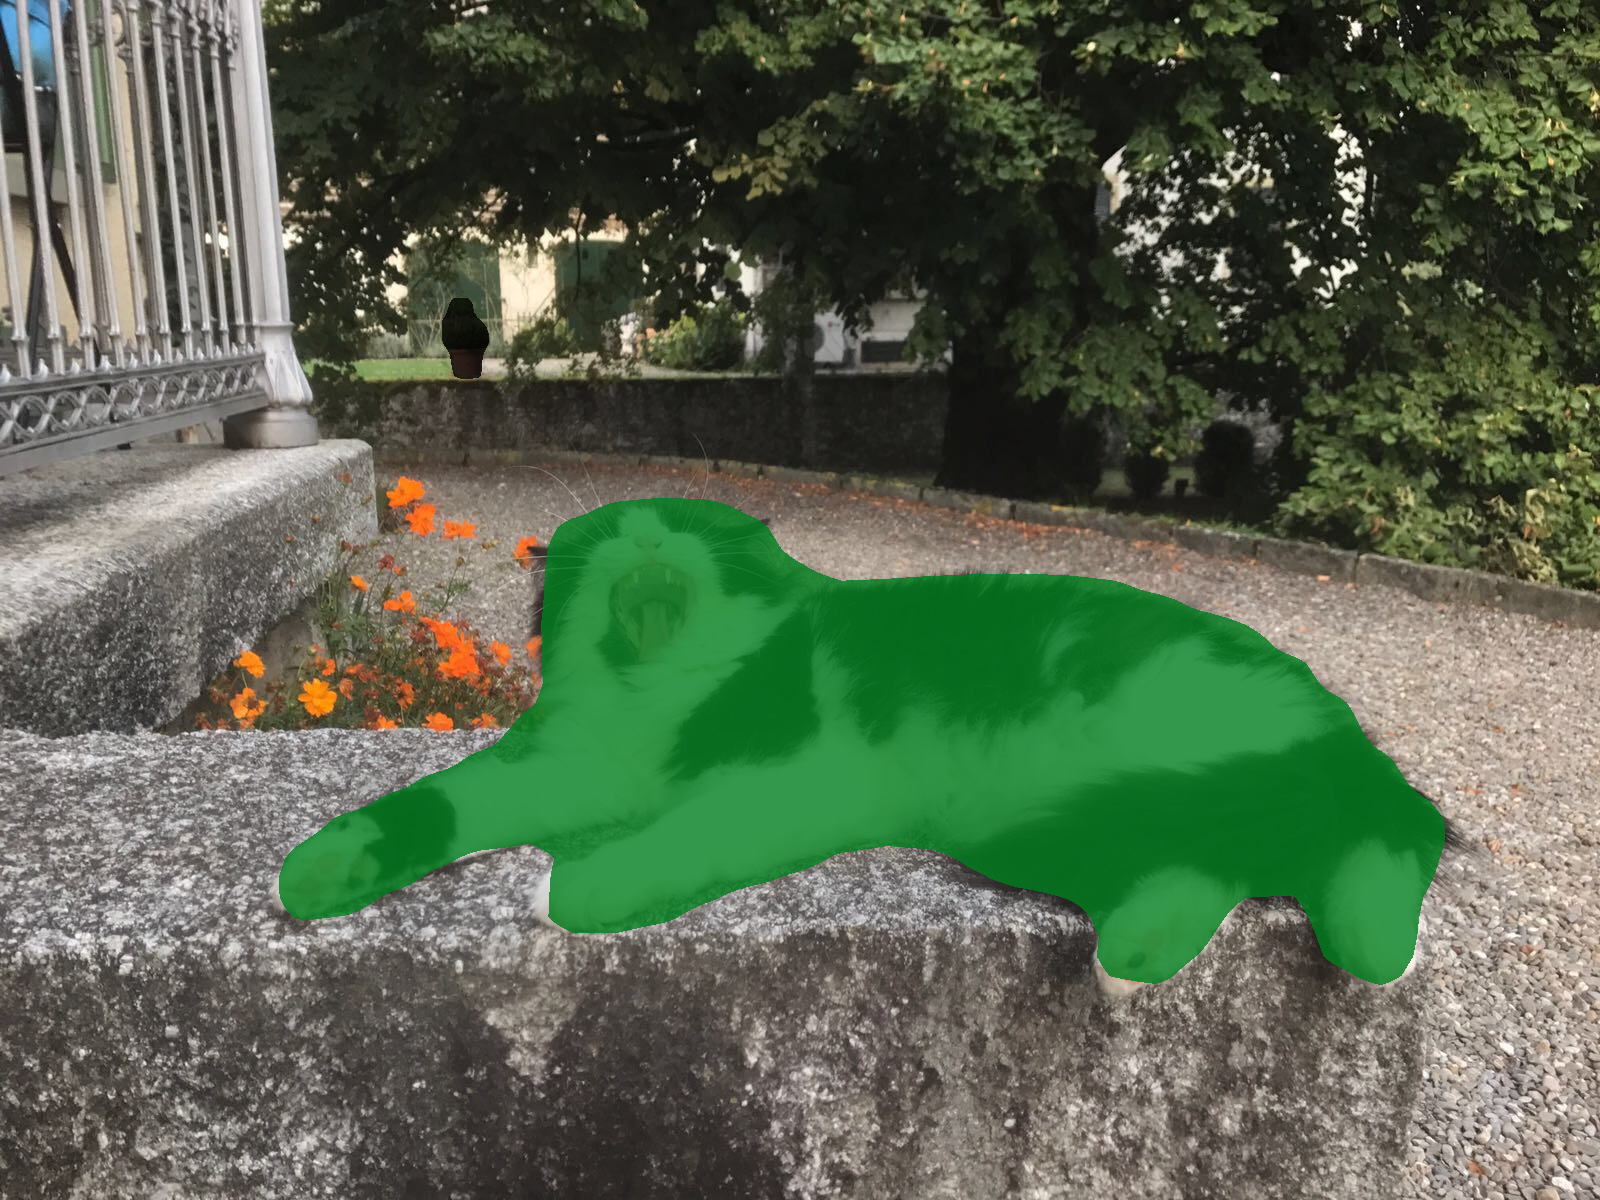

In [25]:
F.to_pil_image(result)